In [12]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict

In [13]:
df_pred = pd.read_csv('./Predictions/Predictions.csv')
df_gt = pd.read_csv('./GroundTruth/GroundTruth.csv')

In [14]:
def calculate_rmse(predictions, ground_truth):
    return np.sqrt(np.mean((predictions - ground_truth)**2))


def calculate_pcc(predictions, ground_truth):
    return np.corrcoef(predictions, ground_truth)[0, 1]


def calculate_hit_ratios(predictions, ground_truth):
    binary_predictions = (predictions > 0.5).astype(int)
    binary_ground_truth = (ground_truth > 0.5).astype(int)

    ahr = np.mean(binary_predictions == binary_ground_truth)
    nahr = np.mean(binary_predictions == binary_ground_truth)

    return ahr, nahr


In [18]:
au_columns = [' AU01_r', ' AU02_r', ' AU04_r', ' AU05_r', ' AU06_r', ' AU07_r']
pred_au = df_pred[au_columns].values
gt_au = df_gt[au_columns].values

results = defaultdict(list)


for i, au in enumerate(au_columns):
    rmse = calculate_rmse(pred_au[:, i], gt_au[:, i])
    pcc = calculate_pcc(pred_au[:, i], gt_au[:, i])
    ahr, nahr = calculate_hit_ratios(pred_au[:, i], gt_au[:, i])

    results['AU'].append(au)
    results['RMSE'].append(rmse)
    results['PCC'].append(pcc)
    results['AHR'].append(ahr)
    results['NAHR'].append(nahr)

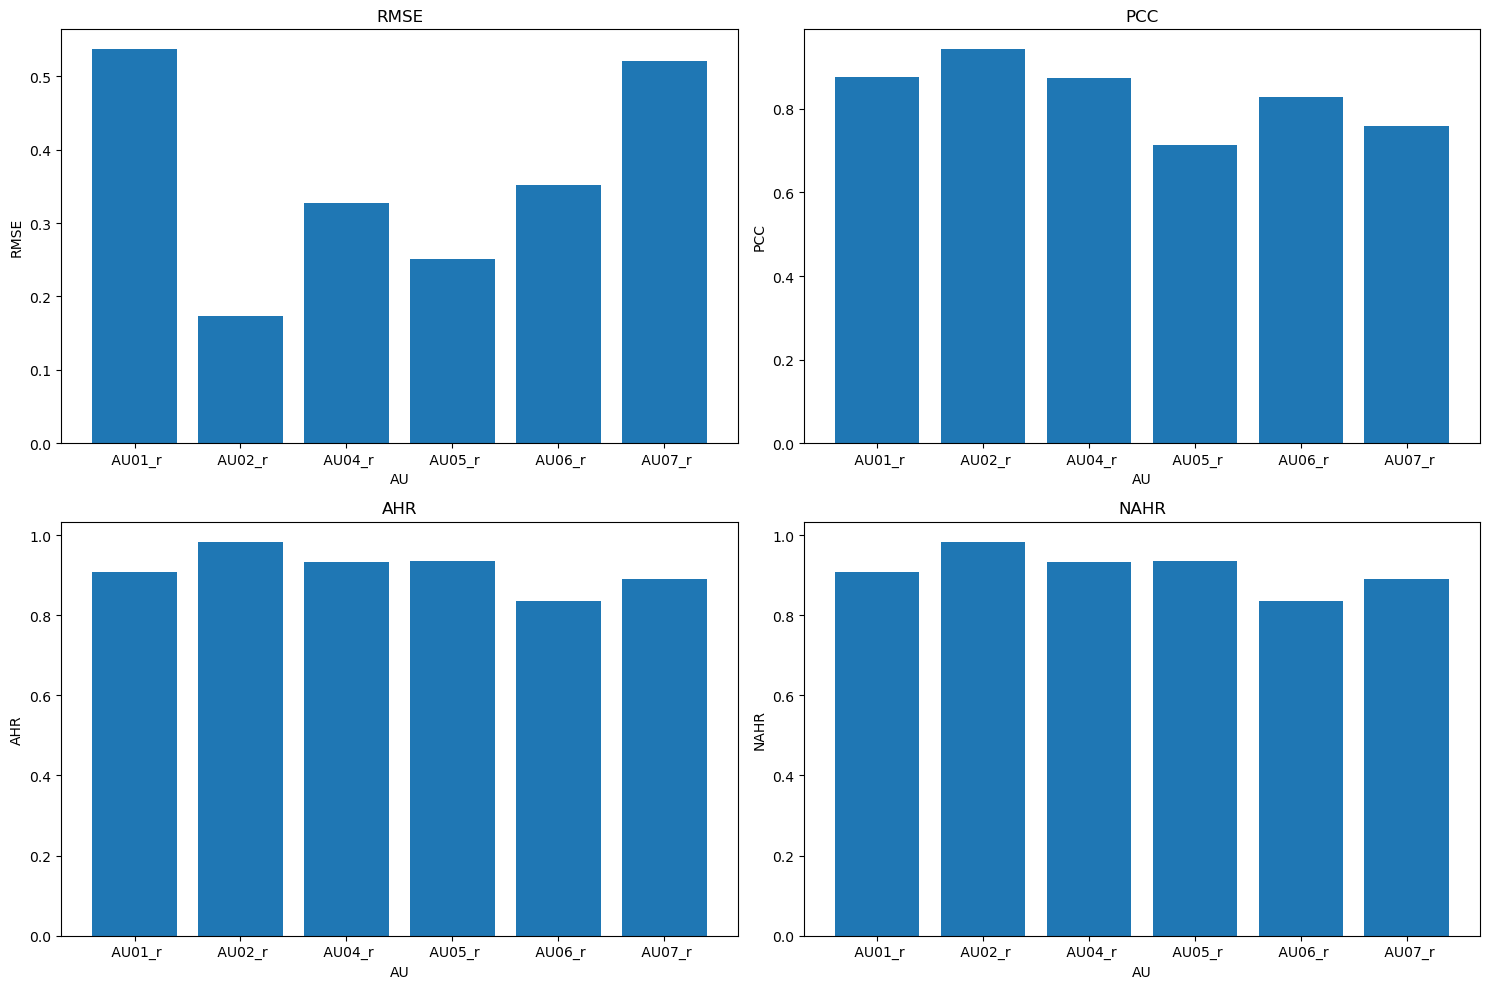

In [19]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

metrics = ['RMSE', 'PCC', 'AHR', 'NAHR']
for ax, metric in zip(axs.flat, metrics):
    ax.bar(results['AU'], results[metric])
    ax.set_title(metric)
    ax.set_xlabel('AU')
    ax.set_ylabel(metric)

plt.tight_layout()
plt.show()